In [1]:
import pandas as pd
import seaborn as sns
import statistics as sts

In [2]:
dataset = pd.read_csv("Churn.csv", sep = ";")

dataset.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [3]:
dataset.shape

(999, 12)

In [4]:
dataset.columns = [
    "Id", "Score", "Estado", "Gênero", "Idade","Patrimônio",
    "Saldo", "Produtos", "TemCartCrédito", "Ativo","Salário", "Saiu"
]

dataset.head()

,Id,Score,Estado,Gênero,Idade,Patrimônio,Saldo,Produtos,TemCartCrédito,Ativo,Salário,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [5]:
agrupado = dataset.groupby(["Estado"]).size()
agrupado

Estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

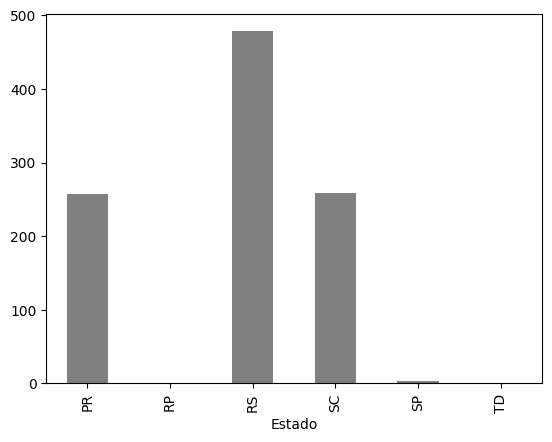

In [6]:
agrupado.plot.bar(color="gray");

In [7]:
agrupado = dataset.groupby(["Gênero"]).size()
agrupado

Gênero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

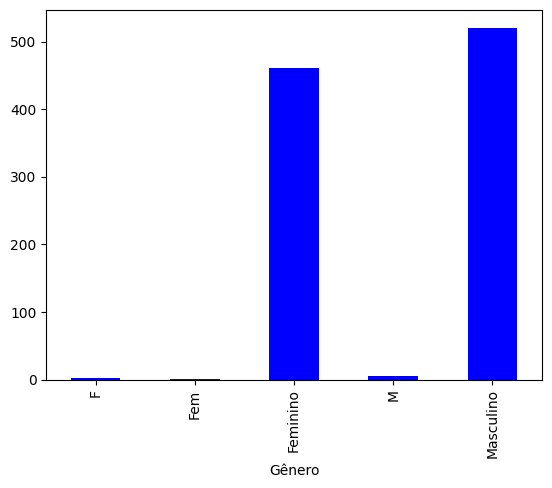

In [8]:
agrupado.plot.bar(color = "blue");

In [9]:
dataset["Score"].describe()

count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: Score, dtype: float64

Text(0.5, 1.0, 'Score')

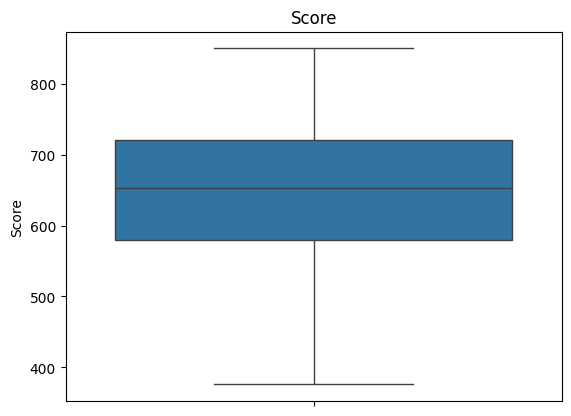

In [10]:
sns.boxplot(dataset["Score"]).set_title("Score")

Text(0.5, 1.0, 'Score')

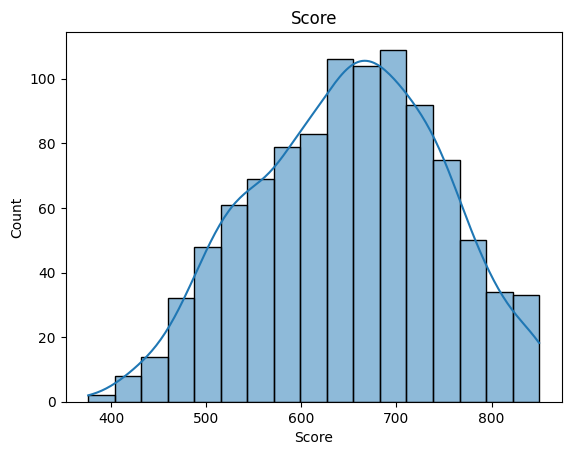

In [11]:
sns.histplot(dataset["Score"], kde=True).set_title("Score")

In [12]:
dataset["Idade"].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

Text(0.5, 1.0, 'Idade')

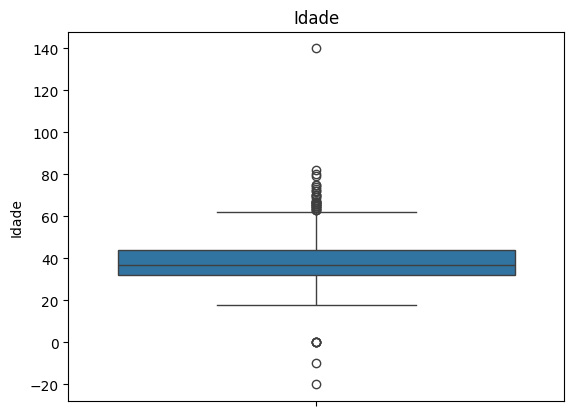

In [13]:
sns.boxplot(dataset["Idade"]).set_title("Idade")

Text(0.5, 1.0, 'Idade')

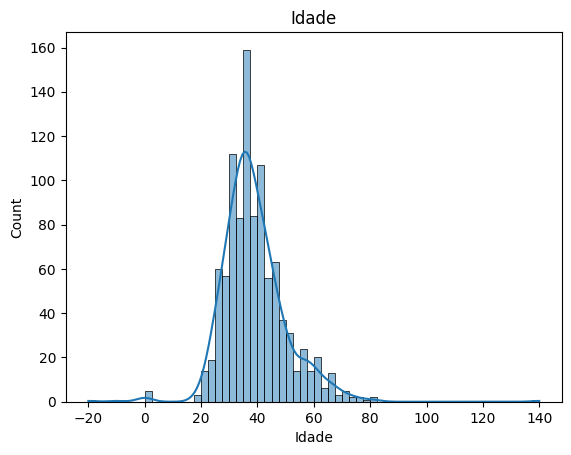

In [14]:
sns.histplot(dataset["Idade"], kde=True).set_title("Idade")

In [15]:
dataset["Saldo"].describe()

count    9.990000e+02
mean     7.164928e+06
std      6.311840e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.958835e+06
75%      1.258684e+07
max      2.117743e+07
Name: Saldo, dtype: float64

Text(0.5, 1.0, 'Saldo')

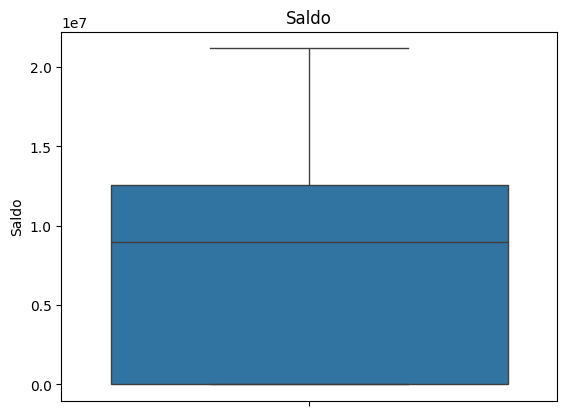

In [16]:
sns.boxplot(dataset["Saldo"]).set_title("Saldo")

Text(0.5, 1.0, 'Saldo')

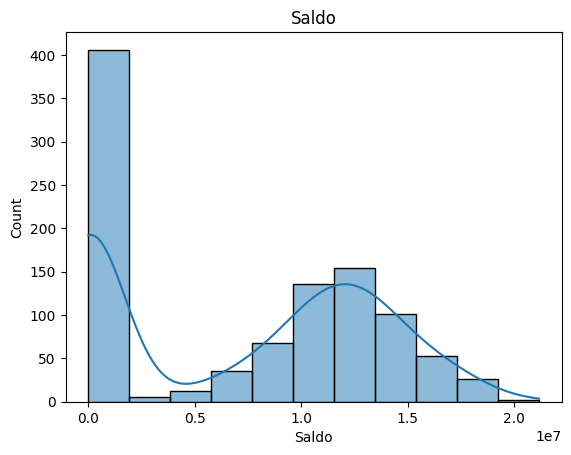

In [17]:
sns.histplot(dataset["Saldo"], kde=True).set_title("Saldo")

In [18]:
dataset["Saldo"]

0             0
1       8380786
2       1596608
3             0
4      12551082
         ...   
994    12310588
995           0
996           0
997    12128627
998    16773882
Name: Saldo, Length: 999, dtype: int64

In [19]:
dataset["Salário"].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salário, dtype: float64

Text(0.5, 1.0, 'Salário')

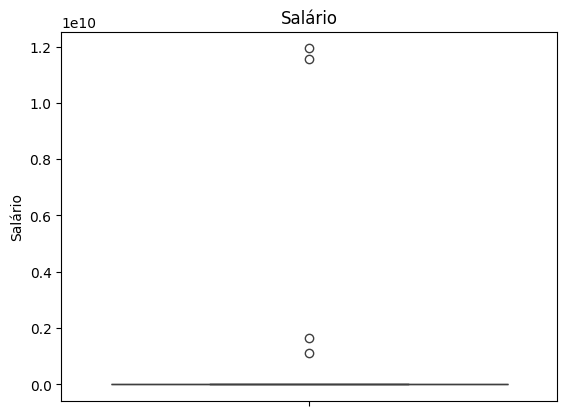

In [20]:
sns.boxplot(dataset["Salário"]).set_title("Salário")

Text(0.5, 1.0, 'Salário')

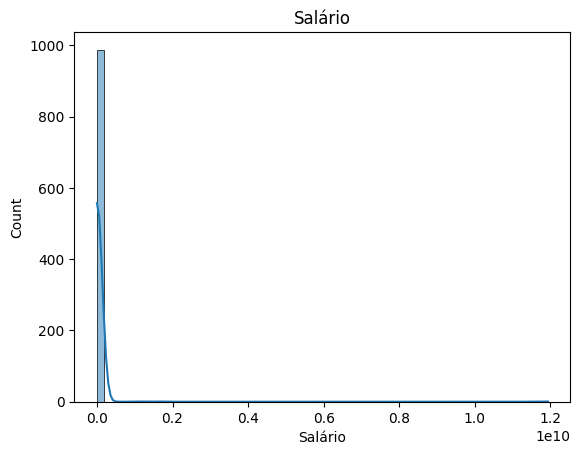

In [21]:
sns.histplot(dataset["Salário"], kde=True).set_title("Salário")


In [22]:
dataset.isnull().sum()

Id                0
Score             0
Estado            0
Gênero            8
Idade             0
Patrimônio        0
Saldo             0
Produtos          0
TemCartCrédito    0
Ativo             0
Salário           7
Saiu              0
dtype: int64

In [23]:
mediana = sts.median(dataset["Salário"])

dataset["Salário"].fillna(mediana, inplace= True)

C:\Users\steph\AppData\Local\Temp\ipykernel_36804\1262145851.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["Salário"].fillna(mediana, inplace= True)


In [24]:
dataset["Salário"].isnull().sum()

np.int64(0)

In [25]:
dataset["Gênero"].isnull().sum()

np.int64(8)

In [26]:
dataset["Gênero"].fillna("Masculino", inplace=True)

C:\Users\steph\AppData\Local\Temp\ipykernel_36804\2547136486.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["Gênero"].fillna("Masculino", inplace=True)


In [27]:
dataset.loc[dataset["Gênero"] == "M", "Gênero"] = "Masculino"
dataset.loc[dataset["Gênero"].isin(["Fem", "F"]), "Gênero"] = "Feminino"

In [28]:
agrupado = dataset.groupby(["Gênero"]).size()
agrupado

Gênero
Feminino     464
Masculino    535
dtype: int64

In [29]:
dataset.loc[(dataset["Idade"] < 0) | (dataset["Idade"] > 120)]

,Id,Score,Estado,Gênero,Idade,Patrimônio,Saldo,Produtos,TemCartCrédito,Ativo,Salário,Saiu
867,869,636,RS,Feminino,-10,1,17083346,1,1,0,11051028.0,1
984,986,773,RS,Masculino,-20,1,12453278,2,0,1,1172357.0,0
990,992,655,RS,Masculino,140,5,93147,2,1,0,6621413.0,0


In [30]:
dataset.loc[(dataset["Idade"] < 0) | (dataset["Idade"] > 120)] = sts.median(
    dataset["Idade"]
)

dataset.loc[(dataset["Idade"] < 0) | (dataset["Idade"] > 120)]

,Id,Score,Estado,Gênero,Idade,Patrimônio,Saldo,Produtos,TemCartCrédito,Ativo,Salário,Saiu


In [31]:
dataset[dataset.duplicated(["Id"], keep=False)]

,Id,Score,Estado,Gênero,Idade,Patrimônio,Saldo,Produtos,TemCartCrédito,Ativo,Salário,Saiu
36,37,490,SC,Masculino,31,3,14526023,1,0,1,11406677.0,0
80,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
867,37,37,37,37,37,37,37,37,37,37,37.0,37
984,37,37,37,37,37,37,37,37,37,37,37.0,37
990,37,37,37,37,37,37,37,37,37,37,37.0,37


In [32]:
dataset.drop_duplicates(subset="Id", keep="first", inplace=True)
dataset[dataset.duplicated(["Id"], keep=False)]

,Id,Score,Estado,Gênero,Idade,Patrimônio,Saldo,Produtos,TemCartCrédito,Ativo,Salário,Saiu


In [35]:
agrupado = dataset.groupby(["Estado"]).size()
agrupado

Estado
PR    257
RP      1
RS    474
SC    258
SP      4
TD      1
dtype: int64

In [36]:
dataset.loc[dataset["Estado"].isin(["RP","SP","TD"]), "Estado"] = "RS"
agrupado = dataset.groupby(["Estado"]).size()
agrupado

Estado
PR    257
RS    480
SC    258
dtype: int64

In [37]:
desv = sts.stdev(dataset["Salário"])
desv

529784177.60963464

In [38]:
dataset.loc[dataset["Salário"] >= 2 * desv]

,Id,Score,Estado,Gênero,Idade,Patrimônio,Saldo,Produtos,TemCartCrédito,Ativo,Salário,Saiu
7,8,376,PR,Feminino,29,4,11504674,4,1,0,1.193469e+10,1
116,118,668,PR,Feminino,37,6,1678644,1,1,0,1.156383e+10,0
170,172,484,RS,Feminino,29,4,13011439,1,1,0,1.640179e+09,0
230,232,673,RS,Masculino,72,1,0,2,0,1,1.119812e+09,0


In [39]:
dataset.loc[dataset["Salário"] >= 2 * desv] = sts.median(
    dataset["Salário"]
)

In [40]:
dataset.head()

,Id,Score,Estado,Gênero,Idade,Patrimônio,Saldo,Produtos,TemCartCrédito,Ativo,Salário,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [41]:
dataset.shape

(995, 12)